In [ ]:
cd ..

In [8]:
import pandas as pd

data = pd.read_csv('complaints_cleaned_delim.csv', delimiter=';', usecols=['text', 'label'])
data

,text,label
0,contact alli friday xx xx xxxx fall behind pay...,Vehicle loan or lease
1,capit one auto financ incorrect without notic ...,"Credit reporting, credit repair services, or o..."
2,hello complaint three credit report companies....,"Credit reporting, credit repair services, or o..."
3,victim ident theft current experian account vi...,"Credit reporting, credit repair services, or o..."
4,two account still credit histori contact credi...,"Credit reporting, credit repair services, or o..."
...,...,...
830202,autom call xxxx capit one '' call home phone e...,Credit card
830203,disput debt sever time resolution. submit pape...,Debt collection
830204,"father die xx xx xxxx. left son belongings, al...",Mortgage
830205,cfbp would like file complaint experian report...,Credit reporting


## Je vais prendre une partie du dataset global, pour un premier test (la distribution des classes sera conservé)

In [9]:
from sklearn.model_selection import train_test_split

def reduce_dataset(df, percentage):
    """
    Réduit la taille du DataFrame en conservant le pourcentage spécifié de données,
    tout en préservant la distribution des labels.

    Args:
    df (pd.DataFrame): DataFrame contenant les colonnes 'text' et 'label'.
    percentage (float): Pourcentage du dataset à conserver, entre 0 et 1.

    Returns:
    pd.DataFrame: DataFrame réduit.
    """
    # Assurez-vous que le pourcentage est entre 0 et 1
    if not 0 < percentage < 1:
        raise ValueError("Le pourcentage doit être compris entre 0 et 1.")
    
    # Utilisation de train_test_split pour réduire le dataset tout en préservant la distribution des labels
    reduced_df, _ = train_test_split(df, train_size=percentage, stratify=df['label'], random_state=42)
    reduced_df.to_csv(f'./complaints_reduced_{int(percentage * 100)}.csv')
    return reduced_df

In [10]:
data_reduced = reduce_dataset(data, 0.3)

## Pour ce premier test, je prend 30% du dataset, soit a peu près 250000 données
## On encode les classes avec un Label Encoder, pour un classifier de type Foret aléatoire (RandomForest). Ce type de classifier n'est pas vraiment sensible à l'ordinalité provoquée par le LabelEncoder

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data_reduced['label'] = label_encoder.fit_transform(data_reduced['label'])

In [12]:
data_reduced

,text,label
591969,experian credit bureau collect account list cr...,5
85051,appli job xxxx xxxx ran background check compa...,6
51476,began work xxxx xxxx xxxx xxxx xxxx xxxx grant...,9
320657,tri obtain free copi credit report month. even...,6
11901,attn fraud depart remov fraudul account credit...,6
...,...,...
410931,victim ident theft debt belong me. pleas see i...,7
444309,letter sent respons telephon call made xxxx xx...,7
337465,hi i'm lil bit stuck transunion report look is...,6
771167,"resurg capit servic xxxx xxxx xxxx, mi xxxx co...",7


In [13]:
X_train, X_test, y_train, y_test = train_test_split(data_reduced['text'], data_reduced['label'] , test_size=0.2)

In [14]:
X_train.shape

(199249,)

In [ ]:
y_train

## On vectorize avec le TF IDF

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_train_transformed = tfidf_vectorizer.fit_transform(X_train)

In [21]:
X_train_transformed.shape

(199249, 62996)

## Premier entrainement : choix par default des hyperparamètres

In [17]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

RandomForestClassifier()

## L'entrainement a mit 80 min sur 199000 données vectorisées en 63000 dimensions (avec le TF IDF)

## On n'oublie pas de vectorizer les données de test

In [18]:
X_test_transformed = tfidf_vectorizer.transform(X_test)

In [19]:
predictions = classifier.predict(X_test_transformed)


## Evaluation initiale : 

balanced_accuracy:     0.4014018568957649
recall:    [0.02931229 0.64827018 0.00176367 0.01974865 0.61911171 0.10464495
 0.94484437 0.78471155 0.43717277 0.89338655 0.01564945 0.63433668
 0.08527132]
precision:    [0.8125     0.61268976 0.5        0.64705882 0.61728395 0.91162791
 0.73778798 0.76419519 0.84771574 0.78889075 0.52631579 0.9031746
 0.62601626]


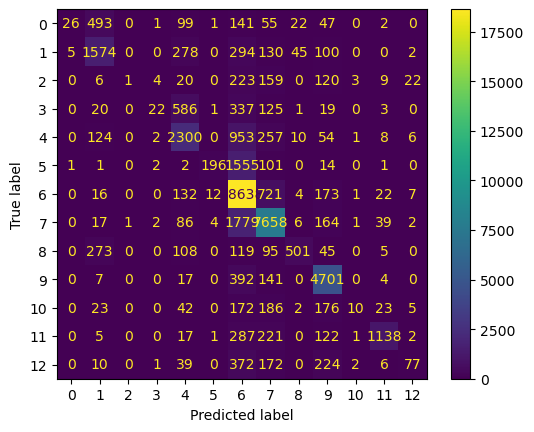

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

accuracy = balanced_accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average=None)
precision = precision_score(y_test, predictions, average=None)
print(f'balanced_accuracy:     {accuracy}')
print(f'recall:    {recall}')
print(f'precision:    {precision}')


confusion_matrix_test = confusion_matrix(y_test, predictions)
display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_test, display_labels=classifier.classes_)
display.plot()
plt.show()

## Un premier modèle de base juste avec le cleaning du notebook fist_processing donne 0.40 de balanced accuracy 

In [ ]:
cell_time_reduced_data = '49 min'
cell_time_initial_data = '90 min'
